Here we will calculate richness from N,E,B data, and plot observed versus predicted. I may also make contour plots of S with E/N and B/N for different N, just to see what that looks like.

In [1]:
#import richness #This is now just in the biomass code
import biomass as richness # To keep the code working, just rename it.
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in data
data = pd.read_csv('data_statevariables.csv')

In [4]:
# Make column for predicted S
data['pS'] = np.zeros(len(data))
for index, row in data.iterrows():
    data.loc[index,'pS'] = richness.richness(row['N'],row['E'],row['B'])

In [15]:
display(data)

,Site,Plot,Type,Location,Year,A_ha,A_est,S,N,E,...,pB1,lambda_1,lambda_2,beta,Notes1,Notes2,Notes3,Notes4,E_2_3,pS
0,Point Reyes National Seashore Bishop Pines,Mt. Vision,Temperate forest community,California USA,2012,0.02560,N,27,1844,2.223879e+06,...,5.648642e+07,0.002382,0.000012,0.002395,Newman et al,Ecosphere,NaN,NaN,2.223879e+06,5.990935
1,Point Reyes National Seashore Bishop Pines,Bayview,Temperate forest community,California USA,2012,0.02560,N,16,486,1.585384e+06,...,4.729688e+07,0.006116,0.000010,0.006126,Newman et al,Ecosphere,"duplicate dbh removed, uncored tree added in f...",NaN,1.585384e+06,58.635361
2,Hubbard Brook Experimental Forest,Watershed 6,Temperate trees,New Hampshire USA,2017,13.23000,N,16,10230,5.532430e+04,...,3.672183e+05,-0.000224,0.000355,0.000131,https://hubbardbrook.org/watersheds/watershed-6,https://hubbardbrook.org/watersheds/watershed-...,https://portal.edirepository.org/nis/metadatav...,"had to drop all dbh and associated N, S) below...",5.532430e+04,5025.069363
3,Kellogg Biological Station,Deciduous Forest 1,Temperate trees,Michigan USA,2018,0.81000,Y,18,259,1.110548e+04,...,6.770949e+04,0.014893,0.001660,0.016552,https://portal.edirepository.org/nis/metadatav...,NaN,NaN,NaN,1.110548e+04,55.957016
4,Kellogg Biological Station,Deciduous Forest 2,Temperate trees,Michigan USA,2018,0.50000,Y,10,172,8.115756e+03,...,5.195158e+04,0.009766,0.001259,0.011025,https://portal.edirepository.org/nis/metadatav...,NaN,NaN,NaN,8.115756e+03,35.110765
5,Kellogg Biological Station,Deciduous Forest 3,Temperate trees,Michigan USA,2018,0.35000,Y,13,136,2.820084e+03,...,1.263401e+04,0.019693,0.004843,0.024536,https://portal.edirepository.org/nis/metadatav...,NaN,NaN,NaN,2.820084e+03,34.953288
6,SCBI Large Forest Dynamics Plot,Front Royal,Temperate trees,Virginia USA,2012,25.60000,N,68,29986,1.110233e+07,...,2.855146e+08,0.000271,0.000006,0.000277,https://esapubs.org/archive/ecol/E094/195/,https://esapubs.org/archive/ecol/E094/195/meta...,NaN,NaN,1.110233e+07,1561.028791
7,CSIRO permanent rainforest plots of North Quee...,EP3,Tropical trees,Queensland Australia,1973,0.50000,N,67,506,4.074955e+03,...,1.252731e+04,0.021325,0.018773,0.040098,https://data.csiro.au/collections/collection/C...,NaN,NaN,NaN,4.074955e+03,123.209470
8,CSIRO permanent rainforest plots of North Quee...,EP18,Tropical trees,Queensland Australia,1975,0.50000,N,79,452,3.915177e+03,...,1.162778e+04,0.036675,0.022811,0.059487,NaN,NaN,NaN,NaN,3.915177e+03,90.260130
9,CSIRO permanent rainforest plots of North Quee...,EP19,Tropical trees,Queensland Australia,1977,0.50000,N,64,397,2.482458e+03,...,6.730767e+03,0.022259,0.030689,0.052947,NaN,NaN,NaN,NaN,2.482458e+03,85.052527


In [8]:
# Choose color scheme
cm = 'winter'#'viridis'
# Get max and min species richness for colour scheme
smin = np.min(data['S'])
smax = np.max(data['S'])
# Set up normalization
norm = plt.Normalize(np.log(smin),np.log(smax))
# Get list of site types
stype = data['Type'].unique()
# Make marker list. Has to be same length as stype
mlist = ['s','^','D','o','X']
if len(stype) != len(mlist):
    print("ERROR: Add more markers!")

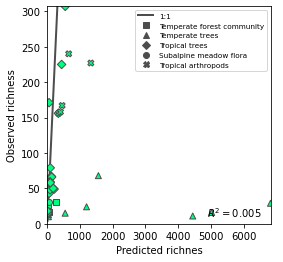

In [51]:
# Figure 1
fig,ax = plt.subplots(figsize=(4,4))

# Plot data
xdata = data['pS']
ydata = data['S']
# Loop through each site type to put a different marker
for m,s in zip(mlist,stype):
    inds = data['Type']==s
    ax.scatter(xdata[inds],ydata[inds],marker=m,c=np.log(data['B'][inds]),norm=norm,cmap=cm,edgecolor='0.3')

# Set range
ymin = np.floor(np.min(ydata))
ymax = np.ceil(np.max(ydata))
xmin = np.floor(np.min(xdata))
xmax = np.ceil(np.max(xdata))
# Set range min as min of those
rmin = np.min([ymin,xmin])
rmax = np.max([ymax,xmax])
ax.set_ylim(0,ymax)
ax.set_xlim(0,xmax)


# Labels
ax.set_xlabel('Predicted richnes')
ax.set_ylabel('Observed richness')

 # Add in R^2 value from regression
lin = linregress(xdata,ydata)
xlin = np.linspace(xmin,xmax)
ax.annotate(r'$R^2 = {:.3f}$'.format(lin[2]**2),(0.73,0.17),xycoords='figure fraction')

# Legend
# Plot a bunch of empty points. Not sure if this is the best way, but it's how I'm doing it!
leg = {}
for m,s in zip(mlist,stype):
    leg[s], = ax.plot([],[],c='0.3',marker=m,linestyle="None")

# Plot 1:1 line at the back and add to legend codes
xrange = np.linspace(rmin,rmax)
leg['1:1'], = ax.plot(xrange,xrange,lw=2,c='0.3',zorder=0)#,label='1:1 line') # Can add this back in
lcodes = np.insert(stype,0,'1:1')

ax.legend([leg[s] for s in lcodes],lcodes,prop={"size":7.3})#,frameon=False)#borderpad=0.0)

# Save
#fig.savefig('Figures/richness.pdf',bbox_inches='tight')

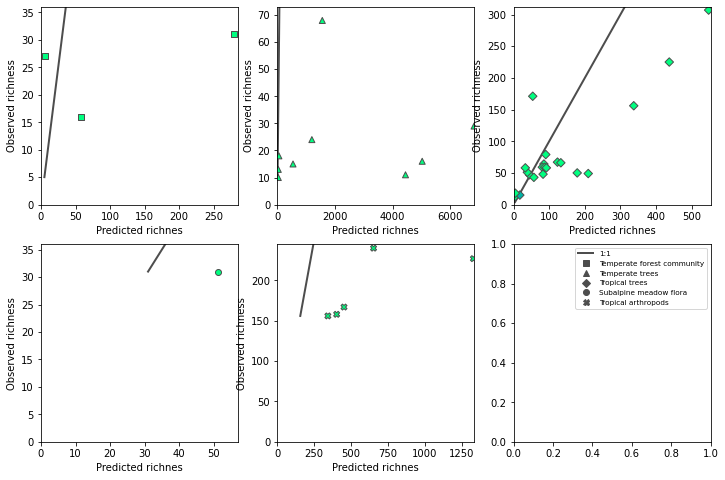

In [58]:
# Figure 1
fig,axs = plt.subplots(2,3,figsize=(12,8))

# Plot data
xdata = data['pS']
ydata = data['S']
# Loop through each site type to put a different marker
for m,s,ax in zip(mlist,stype,axs.flatten()):
    inds = data['Type']==s
    ax.scatter(xdata[inds],ydata[inds],marker=m,c=np.log(data['B'][inds]),norm=norm,cmap=cm,edgecolor='0.3')

    # Set range
    ymin = np.floor(np.min(ydata[inds]))
    ymax = np.ceil(np.max(ydata[inds]))
    xmin = np.floor(np.min(xdata[inds]))
    xmax = np.ceil(np.max(xdata[inds]))
    # Set range min as min of those
    rmin = np.min([ymin,xmin])
    rmax = np.max([ymax,xmax])
    ax.set_ylim(0,ymax+5)
    ax.set_xlim(0,xmax+5)


    # Labels
    ax.set_xlabel('Predicted richnes')
    ax.set_ylabel('Observed richness')

     # Add in R^2 value from regression
    lin = linregress(xdata,ydata)
    xlin = np.linspace(xmin,xmax)
    ax.annotate(r'$R^2 = {:.3f}$'.format(lin[2]**2),(0.73,0.17),xycoords='figure fraction')

    # Legend
    # Plot a bunch of empty points. Not sure if this is the best way, but it's how I'm doing it!
    leg = {}
    for m,s in zip(mlist,stype):
        leg[s], = ax.plot([],[],c='0.3',marker=m,linestyle="None")

    # Plot 1:1 line at the back and add to legend codes
    xrange = np.linspace(rmin,rmax)
    leg['1:1'], = ax.plot(xrange,xrange,lw=2,c='0.3',zorder=0)#,label='1:1 line') # Can add this back in
    lcodes = np.insert(stype,0,'1:1')

axs[1,2].legend([leg[s] for s in lcodes],lcodes,prop={"size":7.3})#,frameon=False)#borderpad=0.0)

# Save
#fig.savefig('Figures/richness.pdf',bbox_inches='tight')

In [59]:
# This obviously looks terrible. Look at a specific case to see why
td = data[data['Site']=='Traunstein Forest Dynamics Plot ']
print('Predicted biomass',richness.biomass(pd.Series({'N':td['N'].values,'E':td['E'].values,'S':td['S'].values})))
print('biomass',td['B'].values)
print('Predicted biomass at predicted S',richness.biomass(
    pd.Series({'N':td['N'].values,'E':td['E'].values,'S':td['pS'].values})))
print('Predicted S',td['pS'].values)
print('S',td['S'].values)
# So these are like a factor of 4 off. Now plot for different S
srange = np.logspace(1,4)
biomass_min = []
for s in srange:
    biomass_min.append(richness.min_biomass(s,td['N'].values,td['E'].values,td['B'].values))

Predicted biomass [4729082.07179318]
biomass [1679991.]
Predicted biomass at predicted S [1679990.99989987]
Predicted S [6823.24640839]
S [29]


Text(0, 0.5, '((Predicted-observed)/observed)**2')

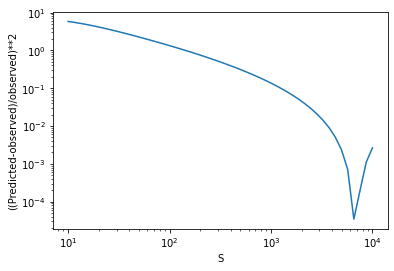

In [60]:
plt.loglog(srange,biomass_min)
plt.xlabel('S')
plt.ylabel('((Predicted-observed)/observed)**2')